In [34]:
import pandas as pd
from pathlib import Path
from fwhm.star_finder import StarFinder
from fwhm.star_matcher import StarMatcher, register_stars
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import defaultdict
import math

In [35]:
# root_dir = Path(r"D:\Astro\auto-focus-samples\m1")
root_dir = Path(r"C:\images\autofocus\set1")
files = list(root_dir.glob("*.fit"))
image_files = [(str(f), re.match(r'.*?_(\d+)_focus', f.stem).group(1)) for f in files]
image_files = sorted(image_files, key=lambda x: int(x[1]))

In [36]:
image_files

[('C:\\images\\autofocus\\set1\\82864_29039_focus.fit', '29039'),
 ('C:\\images\\autofocus\\set1\\82864_29089_focus.fit', '29089'),
 ('C:\\images\\autofocus\\set1\\82864_29114_focus.fit', '29114'),
 ('C:\\images\\autofocus\\set1\\82864_29189_focus.fit', '29189'),
 ('C:\\images\\autofocus\\set1\\82864_29239_focus.fit', '29239')]

In [37]:
registered_stars = register_stars([x[0] for x in image_files])

c:\code\astrocam\fwhm\fwhm.py:178: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  p, success = opt.leastsq(errorfunction, params)
c:\code\astrocam\fwhm\fwhm.py:178: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  p, success = opt.leastsq(errorfunction, params)


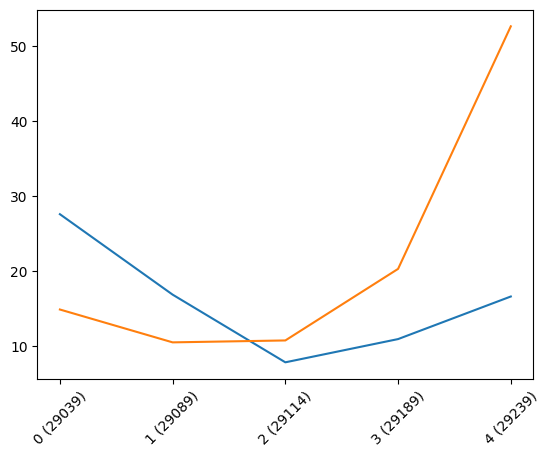

In [41]:
focus_pts = [f"{i} ({x[1]})" for i,x in enumerate(image_files)]
for slist in registered_stars:
  plt.plot(focus_pts, [math.sqrt(s.fwhm_x**2 + s.fwhm_y**2) for s in slist])
plt.xticks(rotation=45)
plt.show()

In [43]:
avgs = defaultdict(list)
for i, (fname, focusnum) in enumerate(image_files):
  total = 0
  for s in registered_stars:
    total += math.sqrt(s[i].fwhm_x**2 + s[i].fwhm_y**2)
  avgs[int(focusnum)].append(total / len(registered_stars[0]) )
avgs = sorted([(k,np.mean(v)) for k,v in avgs.items()], key=lambda x:x[0])

In [44]:
x = [x[0] for x in avgs]
y = [x[1] for x in avgs]
coeffs = np.polyfit(x, y, 2)
yp = np.polyval(coeffs, x)

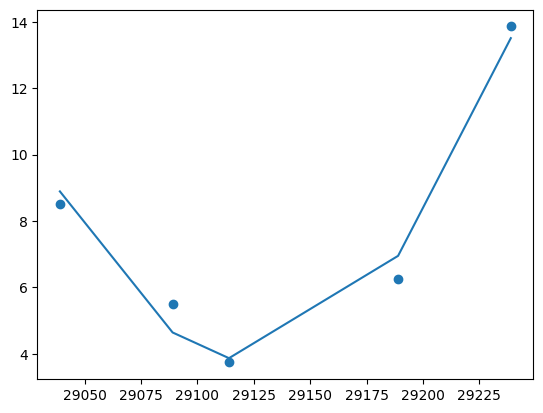

In [45]:
plt.scatter(x, y)
plt.plot(x, yp)

In [46]:
-coeffs[1]/(2*coeffs[0])

np.float64(29122.984342715365)